In [149]:
import pyvisa
import numpy as np
import pandas as pd
import time
#print(np.array([1,2,3,4]))
print(time.strftime('%H:%M:%S'))

rm = pyvisa.ResourceManager() #make the 'resource manager' object through VISA
print(rm.list_resources())#shows what connections are available 

'''then, once a printed instruments such as 'GPIB0::14::INSTR' is returned, find your instrument name and call label it, i.e. for AH 2550 Bridge:
AH_2550 = rm.open_resource('GPIB0::14::INSTR')
Then make it identify itself to confirm.
print(AH_2550.query('*IDN?'))
which is equivalent to the following 2 lines 
AH_2550.write('*IDN?')
print(AH_2550.read())
values = AH_2550.query_ascii_values('CONT?', container=numpy.array, separator='$')
'''
Inst = rm.open_resource('GPIB0::16::INSTR')
print(Inst.query('*IDN?'))

16:07:02
('ASRL1::INSTR', 'ASRL3::INSTR')


VisaIOError: VI_ERROR_CONN_LOST (-1073807194): The connection for the given session has been lost.

In PowerShell, run:

powershell
Copy
Edit
.\qcodes-env\Scripts\Activate
You should see your prompt change to something like:

powershell
Copy
Edit
(qcodes-env) PS C:\Users\Birmingham\Documents\strain-cell>
✅ Step 2: Upgrade pip (recommended)
powershell
Copy
Edit
python -m pip install --upgrade pip
✅ Step 3: Install QCoDeS
Now install QCoDeS and its core dependencies:

powershell
Copy
Edit
pip install qcodes[default]

In [129]:
%matplotlib inline 
# enables the rendering of matplotlib plots directly below code cells. This means that when you execute code that generates Matplotlib plots, the plots are displayed inline within the notebook, rather than in a separate window or output cell.
import qcodes as qc
import logging # logging in python lets you record important information about your program's execution. Not sure if it's actually essential in this case.
import pyvisa
import numpy as np
import pandas as pd
import time

rm = pyvisa.ResourceManager() #make the 'resource manager' object through VISA
print(rm.list_resources())#shows what connections are available 

'''then, once a printed instruments such as 'GPIB0::14::INSTR' is returned, find your instrument name and call label it, i.e. for AH 2550 Bridge:
AH_2550 = rm.open_resource('GPIB0::14::INSTR')
Then make it identify itself to confirm.
print(AH_2550.query('*IDN?'))
which is equivalent to the following 2 lines 
AH_2550.write('*IDN?')
print(AH_2550.read())
values = AH_2550.query_ascii_values('CONT?', container=numpy.array, separator='$')
'''
Inst = rm.open_resource('GPIB0::16::INSTR')
print(Inst.query('*IDN?'))


# i think i first need to test the connection with pyvisa
rm = pyvisa.ResourceManager()
visa_address ='GPIB0::16::INSTR'
vna = rm.open_resource(visa_address)
vna.timeout = 10000
print(vna.query('*IDN?'))

from qcodes.dataset import (
    Measurement,
    initialise_or_create_database_at,
    load_experiment_by_name,
    load_or_create_experiment,
    new_experiment,
    plot_by_id,
    plot_dataset,
)


logger = logging.getLogger() # gets the root logger.
logger.setLevel(logging.DEBUG) # enables all messages at DEBUG level or higher. This is helpful for detailed output and troubleshooting during development or experiments.

# Start experiment
initialise_or_create_database_at("my_database.db") # need to create a database
exp_name = "PNA_Example"
sample_name = "sample"
try:
    exp = load_experiment_by_name(exp_name, sample=sample_name)
    print("Experiment loaded. Last ID no:", exp.last_counter) # Attempts to load an existing experiment from the QCoDeS database using the provided names. If it exists, exp becomes a reference to that experiment, and the last measurement counter is printed.
except ValueError:
    exp = new_experiment(exp_name, sample_name)
    print("Starting new experiment.") # If loading fails (e.g., the experiment doesn't exist), a new experiment is created using new_experiment. This is saved to the database for future reference.

('ASRL1::INSTR', 'ASRL3::INSTR')


VisaIOError: VI_ERROR_CONN_LOST (-1073807194): The connection for the given session has been lost.

In [ ]:
n=100

vna_114
Connected to: Agilent Technologies N5232A (serial:MY52221251, firmware:A.10.00.00) in 16.84s
we are connected to{'vendor': 'Agilent Technologies', 'model': 'N5232A', 'serial': 'MY52221251', 'firmware': 'A.10.00.00'}
the parameters arevna_114_tr1_trace
Starting experimental run with id: 62. 
CH1_S11_1
ChannelList(<KeysightN5232B: vna_114>, KeysightPNATrace, [<KeysightPNATrace: vna_114_tr1 of KeysightN5232B: vna_114>])
1
CH1_S11_1,S21
Starting experimental run with id: 63. 


([<Axes: title={'center': 'Run #63, Experiment PNA_Example (sample)'}, xlabel='Frequency (MHz)', ylabel='Magnitude (dB)'>],
 [None])

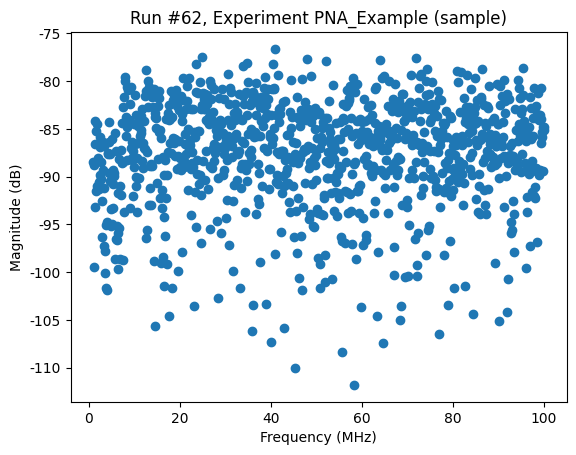

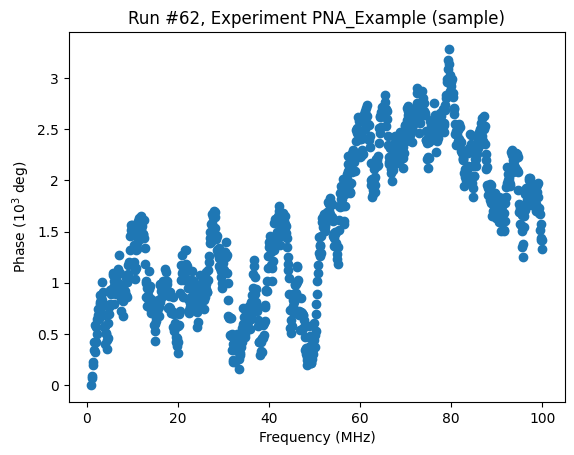

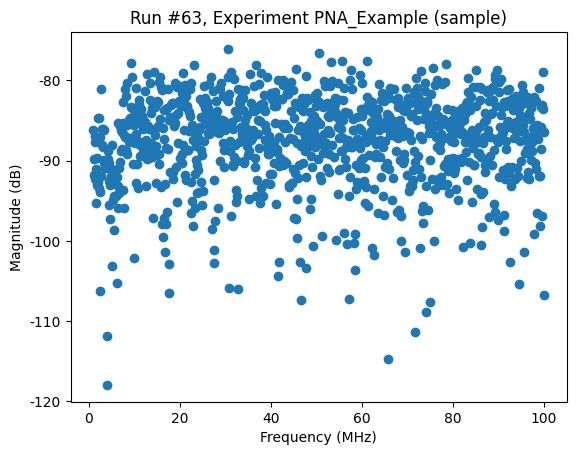

In [ ]:
from qcodes.parameters import Parameter
from qcodes import Instrument
from qcodes.utils.validators import Arrays, Numbers



from qcodes.instrument_drivers.Keysight import KeysightN5232B # also note that only N5232B for qcodes, not N5232A, so need to see if this affects something
n+=1
vna_num = f'vna_{n}'
print(vna_num)
vna = KeysightN5232B(vna_num, visa_address) # need to add the IP address of the vna here

print(f'we are connected to{vna.IDN()}') #just a line to check that we're connected to the right instrument
print(f'the parameters are{ vna.trace}')


# Set up a frequency sweep from 100 MHz to 1 GHz, with 1001 points-just picked random frequency values but will adjust accordingly later
vna.start(10**6)
vna.stop(10**8)
vna.points(1001)
vna.trace() # selects the S21 parameter, which is the signal from port 1 to port 2 (forward transmission)


# Disable automatic sweeping
vna.auto_sweep(False)

# Run a measurement
meas = Measurement()
meas.register_parameter(vna.magnitude)
meas.register_parameter(vna.phase)


with meas.run() as datasaver:
    vna.traces.tr1.run_sweep()  # Ask the vNA to take a measurement
    mag = vna.magnitude()
    phase = vna.unwrapped_phase()
    datasaver.add_result((vna.magnitude, mag), (vna.phase, phase))
    dataid = datasaver.run_id
plot_by_id(dataid)

print(vna.traces.tr1.trace_name)


# Disable automatic sweeping
vna.auto_sweep(False)
print(vna.traces)
print(len(vna.traces))

catalog = vna.get_trace_catalog()
print(catalog)

#vna.enable_trace(2)
vna.enable_trace(1)

# Update the list of traces
traces = vna.traces

# Run a measurement
meas = Measurement()
meas.register_parameter(traces.tr1.magnitude)

#meas.register_parameter(traces.CH1_S11_1.magnitude)
#meas.register_parameter(traces.tr3.magnitude)
#meas.register_parameter(traces.tr4.magnitude)

with meas.run() as datasaver:
    traces.tr1.run_sweep()  # Ask the PNA to take a measurement
    data = []
    for trace in traces:
        mag = trace.magnitude()
        data.append((trace.magnitude, mag))
    datasaver.add_result(*data)
    dataid = datasaver.run_id
plot_by_id(dataid)


In [ ]:
# Get current active trace number
print(vna.active_trace())  # might return: 2

# Set active trace to trace number 3
#vna.active_trace(2)
#print(vna.active_trace())




VisaIOError: ('VI_ERROR_CONN_LOST (-1073807194): The connection for the given session has been lost.', "asking 'CALC:PAR:MNUM?' to <KeysightN5232B: vna_114>", 'getting vna_114_active_trace')

Connected to: Agilent Technologies N5232A (serial:MY52221251, firmware:A.10.00.00) in 0.10s
we are connected to{'vendor': 'Agilent Technologies', 'model': 'N5232A', 'serial': 'MY52221251', 'firmware': 'A.10.00.00'}
the parameters are{'IDN': <qcodes.parameters.parameter.Parameter: IDN at 1249914676432>, 'timeout': <qcodes.parameters.parameter.Parameter: timeout at 1249914682000>, 'output': <qcodes.parameters.parameter.Parameter: output at 1251622980864>, 'power': <qcodes.parameters.parameter.Parameter: power at 1249914962080>, 'if_bandwidth': <qcodes.parameters.parameter.Parameter: if_bandwidth at 1249914962656>, 'averages_enabled': <qcodes.parameters.parameter.Parameter: averages_enabled at 1249914963184>, 'averages': <qcodes.parameters.parameter.Parameter: averages at 1249914963808>, 'start': <qcodes.parameters.parameter.Parameter: start at 1249914964384>, 'stop': <qcodes.parameters.parameter.Parameter: stop at 1249914964960>, 'center': <qcodes.parameters.parameter.Parameter: center at 1249914965536>, 'span': <qcodes.parameters.parameter.Parameter: span at 1249914966112>, 'cw': <qcodes.parameters.parameter.Parameter: cw at 1249914966688>, 'points': <qcodes.parameters.parameter.Parameter: points at 1249914967264>, 'electrical_delay': <qcodes.parameters.parameter.Parameter: electrical_delay at 1249914967840>, 'sweep_time': <qcodes.parameters.parameter.Parameter: sweep_time at 1249914968416>, 'sweep_mode': <qcodes.parameters.parameter.Parameter: sweep_mode at 1249914968848>, 'sweep_type': <qcodes.parameters.parameter.Parameter: sweep_type at 1249914969424>, 'group_trigger_count': <qcodes.parameters.parameter.Parameter: group_trigger_count at 1249914672544>, 'trigger_source': <qcodes.parameters.parameter.Parameter: trigger_source at 1249914969904>, 'frequency_axis': <qcodes.instrument_drivers.Keysight.N52xx.PNAAxisParameter: frequency_axis at 1249914970336>, 'frequency_log_axis': <qcodes.instrument_drivers.Keysight.N52xx.PNALogAxisParamter: frequency_log_axis at 1249914970816>, 'time_axis': <qcodes.instrument_drivers.Keysight.N52xx.PNATimeAxisParameter: time_axis at 1249914971200>, 'active_trace': <qcodes.parameters.parameter.Parameter: active_trace at 1249914971536>, 'trace': <qcodes.parameters.parameter.Parameter: trace at 1249914972688>, 'format': <qcodes.parameters.parameter.Parameter: format at 1249914973312>, 'magnitude': <qcodes.instrument_drivers.Keysight.N52xx.FormattedSweep: magnitude at 1249914973792>, 'linear_magnitude': <qcodes.instrument_drivers.Keysight.N52xx.FormattedSweep: linear_magnitude at 1249914974272>, 'phase': <qcodes.instrument_drivers.Keysight.N52xx.FormattedSweep: phase at 1249914974656>, 'unwrapped_phase': <qcodes.instrument_drivers.Keysight.N52xx.FormattedSweep: unwrapped_phase at 1249914975040>, 'group_delay': <qcodes.instrument_drivers.Keysight.N52xx.FormattedSweep: group_delay at 1249914975424>, 'real': <qcodes.instrument_drivers.Keysight.N52xx.FormattedSweep: real at 1249914975808>, 'imaginary': <qcodes.instrument_drivers.Keysight.N52xx.FormattedSweep: imaginary at 1249914976192>, 'polar': <qcodes.instrument_drivers.Keysight.N52xx.FormattedSweep: polar at 1249914976576>, 'auto_sweep': <qcodes.parameters.parameter.Parameter: auto_sweep at 1249914977056>}

In [ ]:
import qcodes.instrument_drivers.Keysight as ks
print(dir(ks))

['Infiniium', 'Keysight33210A', 'Keysight33250A', 'Keysight33511B', 'Keysight33512B', 'Keysight33522B', 'Keysight33622A', 'Keysight33xxx', 'Keysight33xxxOutputChannel', 'Keysight33xxxSyncChannel', 'Keysight34410A', 'Keysight34411A', 'Keysight34460A', 'Keysight34461A', 'Keysight34465A', 'Keysight34470A', 'Keysight344xxA', 'Keysight344xxADisplay', 'Keysight344xxASample', 'Keysight344xxATrigger', 'Keysight34934A', 'Keysight34980A', 'Keysight34980ASwitchMatrixSubModule', 'KeysightAgilent_33XXX', 'KeysightB1500', 'KeysightB1500CVSweepMeasurement', 'KeysightB1500CVSweeper', 'KeysightB1500Correction', 'KeysightB1500FrequencyList', 'KeysightB1500IVSweeper', 'KeysightB1500Module', 'KeysightB1511B', 'KeysightB1517A', 'KeysightB1520A', 'KeysightB1530A', 'KeysightB2200', 'KeysightB2201', 'KeysightB220X', 'KeysightB2962A', 'KeysightB2962AChannel', 'KeysightE4980A', 'KeysightE4980ACorrection', 'KeysightE4980AMeasurementPair', 'KeysightE4980AMeasurements', 'KeysightErrorQueueMixin', 'KeysightInfiniiu

['Infiniium', 'Keysight33210A', 'Keysight33250A', 'Keysight33511B', 'Keysight33512B', 'Keysight33522B', 'Keysight33622A', 'Keysight33xxx', 'Keysight33xxxOutputChannel', 'Keysight33xxxSyncChannel', 'Keysight34410A', 'Keysight34411A', 'Keysight34460A', 'Keysight34461A', 'Keysight34465A', 'Keysight34470A', 'Keysight344xxA', 'Keysight344xxADisplay', 'Keysight344xxASample', 'Keysight344xxATrigger', 'Keysight34934A', 'Keysight34980A', 'Keysight34980ASwitchMatrixSubModule', 'KeysightAgilent_33XXX', 'KeysightB1500', 'KeysightB1500CVSweepMeasurement', 'KeysightB1500CVSweeper', 'KeysightB1500Correction', 'KeysightB1500FrequencyList', 'KeysightB1500IVSweeper', 'KeysightB1500Module', 'KeysightB1511B', 'KeysightB1517A', 'KeysightB1520A', 'KeysightB1530A', 'KeysightB2200', 'KeysightB2201', 'KeysightB220X', 'KeysightB2962A', 'KeysightB2962AChannel', 'KeysightE4980A', 'KeysightE4980ACorrection', 'KeysightE4980AMeasurementPair', 'KeysightE4980AMeasurements', 'KeysightErrorQueueMixin', 'KeysightInfiniium', 'KeysightInfiniiumBoundMeasurement', 'KeysightInfiniiumChannel', 'KeysightInfiniiumFunction', 'KeysightInfiniiumUnboundMeasurement', 'KeysightM9336A', 'KeysightM9336AAWGChannel', 'KeysightM960x', 'KeysightN5173B', 'KeysightN5183B', 'KeysightN5222B', 'KeysightN5230C', 'KeysightN5232B', 'KeysightN5245A', 'KeysightN6705B', 'KeysightN6705BChannel', 'KeysightN9030B', 'KeysightN9030BPhaseNoiseMode', 'KeysightN9030BSpectrumAnalyzerMode', 'KeysightP5004B', 'KeysightP9374A', 'KeysightPNABase', 'KeysightPNAPort', 'KeysightPNATrace', 'KeysightPNAxBase', 'Keysight_33210a', 'Keysight_33250a', 'Keysight_33511b', 'Keysight_33512b', 'Keysight_33522b', 'Keysight_33622a', 'Keysight_34410A_submodules', 'Keysight_34411A_submodules', 'Keysight_34460A_submodules', 'Keysight_34461A_submodules', 'Keysight_34465A_submodules', 'Keysight_34470A_submodules', 'Keysight_B2962A', 'Keysight_N5173B', 'Keysight_N5183B', 'Keysight_N5222B', 'Keysight_N5230C', 'Keysight_N5245A', 'Keysight_N6705B', 'Keysight_N9030B', 'Keysight_P5004B', 'Keysight_P9374A', 'KtM960x', 'KtM960xDefs', 'KtMAwg', 'KtMAwgDefs', 'N51x1', 'N52xx', '_Keysight_N5232B', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'keysight_34934a', 'keysight_34980a', 'keysight_34980a_submodules', 'keysight_b220x', 'keysight_e4980a', 'keysightb1500', 'private']


In [ ]:
catalog = vna.get_trace_catalog()
print(catalog)



CH1_S11_1,S21
